
# GDP growth rate

In [1]:
# Subscribe to api.insee.fr and get your credentials!
# Save your credentials with init_conn function :
# from pynsee.utils.init_conn import init_conn
# init_conn(insee_key="my_insee_key", insee_secret="my_insee_secret")

# Beware : any change to the keys should be tested after having cleared the cache
# Please do : from pynsee.utils import clear_all_cache; clear_all_cache()"

Getting datasets list: 100%|██████████| 197/197 [00:00<00:00, 1287.44it/s]


CNT-2014-PIB-EQB-RF : metadata update triggered because it is not found locally


1/1 - Getting series: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]



Data has been cached



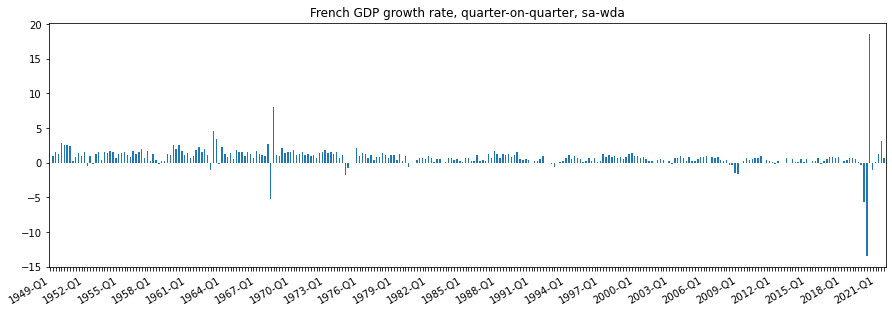

In [2]:
from pynsee.macrodata import * 

import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline
import matplotlib.pyplot as plt

# get macroeconomic datasets list
insee_dataset = get_dataset_list()
insee_dataset.head()

# get series key (idbank), for Gross domestic product balance
id = get_series_list("CNT-2014-PIB-EQB-RF")

id = id.loc[(id.FREQ == "T") &
            (id.OPERATION == "PIB") &
            (id.NATURE == "TAUX") &
            (id.CORRECTION == "CVS-CJO")]

data = get_series(id.IDBANK)
data = split_title(df = data, n_split=2)

# define plot
ax = data.plot(kind='bar', x="TIME_PERIOD", stacked=True, y="OBS_VALUE", figsize=(15,5))
#add title
plt.title("French GDP growth rate, quarter-on-quarter, sa-wda")
# customize x-axis tickers
ticklabels = ['']*len(data.TIME_PERIOD)
ticklabels[::12] = [item for item in data.TIME_PERIOD[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
#remove legend
ax.get_legend().remove()
#remove x-axistitle
ax.xaxis.label.set_visible(False)
plt.show()